**Problem 1**: Preprocessing the data



In [ ]:
# import libraries:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, auc, f1_score, plot_roc_curve, roc_auc_score, roc_curve
from sklearn.model_selection import StratifiedKFold, train_test_split

In [ ]:
# 1) Import the Hitters.csv file straight from GitHub:
CSV_URL = 'https://raw.githubusercontent.com/jcrouser/islr-python/master/data/Hitters.csv'
df = pd.read_csv(CSV_URL)

In [ ]:
# 2) Print the data. It looks like a list of baseball hitters' statistics
print(df.head())

              Player  AtBat  Hits  HmRun  ...  Assists  Errors  Salary  NewLeague
0     -Andy Allanson    293    66      1  ...       33      20     NaN          A
1        -Alan Ashby    315    81      7  ...       43      10   475.0          N
2       -Alvin Davis    479   130     18  ...       82      14   480.0          A
3      -Andre Dawson    496   141     20  ...       11       3   500.0          N
4  -Andres Galarraga    321    87     10  ...       40       4    91.5          N

[5 rows x 21 columns]


In [ ]:
# 3) Print the shape of the data:
print(df.shape)

(322, 21)


In [ ]:
# 3) Check for missing values (and count them):
#    The data has 59 missing values, all in the 'Salary' column. 
print(df.isnull().sum())

Player        0
AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64


In [ ]:
# 5) Drop any columns with missing data:
#    Note: the inplace argument actually changes the given dataframe rather than
#          outputting the new dataframe and keeping the one in memory unchanged.
df.dropna(inplace=True)

In [ ]:
# 6) Extract features and labels (feature is NewLeague):
features = df.loc[:, df.columns != 'NewLeague']
labels = df[['NewLeague']]

In [ ]:
# 7) Encoding:
nonnumeric = features.select_dtypes(exclude=['int64', 'float64'])
numeric = features.select_dtypes(include=['int64', 'float64'])

# Now convert nonnumeric columns to dummy columns with indicator variables:
dummies = pd.get_dummies(nonnumeric)

# Concatenate numeric inputs with (processed) nonnumeric 'dummy' table:
data = pd.concat([numeric, dummies], axis=1)

In [ ]:
# 8) Encoding the labels:
labels = labels.replace('A', 0)
labels = labels.replace('N', 1)

# Changing labels to a 1d array:
labels = np.array(labels).ravel()

**Problem 2**: Applying logistic regression

In [ ]:
# 1) Splitting the data into train/test (80% train, 20% test):
train_inputs, test_inputs, train_outputs, test_outputs = train_test_split(
        data, labels, test_size = 0.2)

In [ ]:
# 2) Applying logistic regression:
classifier = LogisticRegression(max_iter=10000).fit(train_inputs, train_outputs)

In [ ]:
# 3) Compare the model's prediction with the true test labels:
predictions = classifier.predict(test_inputs)

# use predictions to calculate accuracy score:
accuracy = accuracy_score(test_outputs, predictions)

# Print the accuracy:
print(accuracy)

0.9056603773584906


To measure the output accuracy of my model, I used the *accuracy_score* function from sklearn's *metrics* library. This function is used for classification algorithms, and returns the ratio of the total number of correct classifications over the total number of predictions made.

It is worth noting that using something like mean square-error doesn't make too much sense here, as the predictions are categorical. We are only concerned with whether the classifier predicted correctly or not, not the distance between the prediction and the label.

In [ ]:
# To illustrate what accuracy_score is doing, here's a simple function that does the same:
def my_accuracy_score(outputs, predictions):
  if len(outputs) != len(predictions):
    return None
  return sum([1 if i == j else 0 for i, j in zip(outputs, predictions)]) / len(outputs)

**Problem 3**: Models for Heart Disease

In [ ]:
# 1) Data exploration: 
# Import the data:
df2 = pd.read_csv('https://raw.githubusercontent.com/oriyonay/RandomPublicThings/master/heart_input.csv')

# Print the input features:
for inputfeature in df2:
  print(inputfeature)

Age
Sex
Chest Pain
BP
Cholestoral
fasting blood sugar > 120
resting ECG
max hr
angina
oldpeak
slope
major vessels
defect
heart disease


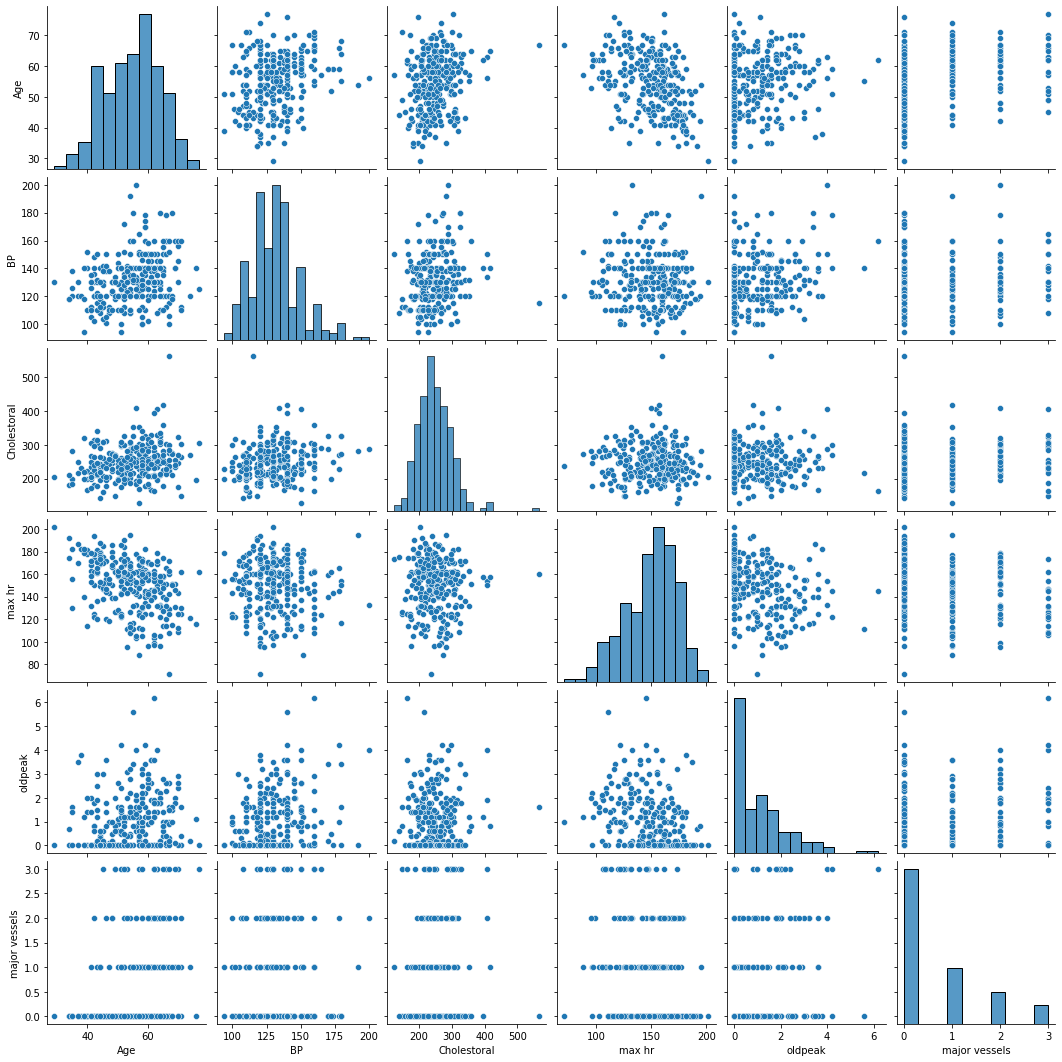

In [ ]:
# Plot scatterplots and histograms using Seaborn:
sns.pairplot(df2)
plt.show()

In this dataset, we are given the medical information of 270 middle-aged people. The categorical features include things like the patients' sex, chest pain (which is difficult to quantify), etc. The continuous features were actual medical measurements, such as the patients' blood pressure and cholesterol levels. 

In [ ]:
# 2) Preprocessing the data (in a similar fashion as above):
# Check if any column contains null elements:
print(df2.isnull().sum())

Age                          0
Sex                          0
Chest Pain                   0
BP                           0
Cholestoral                  0
fasting blood sugar > 120    0
resting ECG                  0
max hr                       0
angina                       0
oldpeak                      0
slope                        0
major vessels                0
defect                       0
heart disease                0
dtype: int64


We can see that there are no null values in this dataset, so no columns need to be dropped or processed.

In [ ]:
# We now extract the features and the label (label being 'heart disease'):
features = df2.loc[:, df2.columns != 'heart disease']
labels = df2[['heart disease']]

In [ ]:
# Encoding the labels from Yes/No to 0/1:
labels = labels.replace('Yes', 1)
labels = labels.replace('No', 0)

# Changing labels to a 1d array:
labels = np.array(labels).ravel()

In here, I chose to handle categorical variables in the same fashion I handled them in the exercise above: use them to create dummy variables (which works significantly better here, as there are far fewer dummy variables to be created) and concatenate them to the numeric data.

In [ ]:
# Splitting the dataframe into continuous and categorical variables:
nonnumeric = features.select_dtypes(exclude=['int64', 'float64'])
numeric = features.select_dtypes(include=['int64', 'float64'])

# Now convert nonnumeric columns to dummy columns with indicator variables:
dummies = pd.get_dummies(nonnumeric)

# Concatenate numeric inputs with (processed) nonnumeric 'dummy' table:
data = pd.concat([numeric, dummies], axis=1)

It is worth noting that here we have dummy variables such as *Sex_Female* and *Sex_Male*, which are both the same as they encode the same data. I did not delete these in this case but may experiment with this later on.

In [ ]:
# Splitting the data into train/test (80% train, 20% test):
train_inputs, test_inputs, train_outputs, test_outputs = train_test_split(
        data, labels, test_size = 0.2)

In [ ]:
# Train a linear regression and a logistic regression model on the data:
logistic_classifier = LogisticRegression(max_iter=10000).fit(train_inputs, train_outputs)
linear_classifier = LinearRegression().fit(train_inputs, train_outputs)

In [ ]:
# Testing the models:

# Make predictions using the models:
logistic_predictions = logistic_classifier.predict(test_inputs)
linear_predictions = linear_classifier.predict(test_inputs)

# Since the predictions made by linear regression are continuous, we have to convert
# them into binary, so we use a naive threshold of 0.5 to do this.
# (Experimentally, threshold = 0.53 seems to work best).
# (Another option is to use mean square-error or a similar function, but that
# simply wouldn't tell us much).
threshold = 0.5
for i in range(len(linear_predictions)):
  prediction = linear_predictions[i]
  linear_predictions[i] = 1 if prediction > threshold else 0

# use predictions to calculate accuracy score:
logistic_accuracy = accuracy_score(test_outputs, logistic_predictions)
linear_accuracy = accuracy_score(test_outputs, linear_predictions)

# Print the accuracy:
print('Logistic regression accuracy: %.2f' % logistic_accuracy)
print('Linear regression accuracy: %.2f' % linear_accuracy)

Logistic regression accuracy: 0.87
Linear regression accuracy: 0.87


If we wanted to get the predicted risk that a given person might get a heart disease using the linear regression model, we could normalize the predictions made by the linear regression algorithm using a sigmoid function.

In [ ]:
# 2a) Print the coefficients of each model:
print('Coefficients from logistic regression:')
print(logistic_classifier.coef_)
print()
print('Coefficients from linear regression:')
print(linear_classifier.coef_)

Coefficients from logistic regression:
[[-0.0191613   0.01485644  0.00972207 -0.02017061  0.26942229  1.12074318
   0.72804824 -0.72881775  0.87658632  0.30858665 -0.65167622 -0.53426627
   0.14552704 -0.14629655  0.2395938   0.06632499 -0.30668831 -0.41899653
   0.41822702  0.10388     0.46750868 -0.5721582  -0.34675346 -0.49647518
   0.84245913]]

Coefficients from linear regression:
[-0.00153607  0.00126586  0.00076995 -0.00221545  0.02815829  0.13292374
  0.07996956 -0.07996956  0.13737291  0.02907757 -0.07716111 -0.08928937
  0.01440166 -0.01440166  0.00615855  0.07044054 -0.07659908 -0.06346172
  0.06346172  0.02870111  0.06385279 -0.09255389 -0.06640412 -0.07307095
  0.13947507]


To me, these coefficients look pretty different - this is because logistic regression is regressing for the probability of some prediction being true rather than trying to estimate the ground truth the way linear regression does.

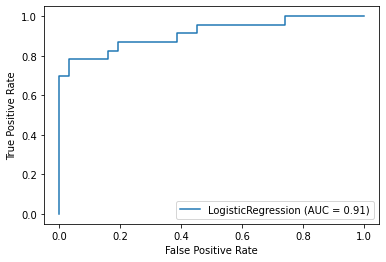

In [ ]:
# 2b) Plotting the ROC curve for both models:
plot_roc_curve(logistic_classifier, test_inputs, test_outputs)
plt.show()

No handles with labels found to put in legend.


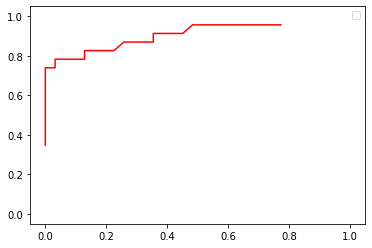

In [ ]:
# This is a bit more complicated for linear regression, since the output is not binary.
# We have to plot the ROC curve manually:

# recalculate linear predictions (since we rounded it previously):
linear_predictions = linear_classifier.predict(test_inputs)

# test different thresholds:
fpr_list = []
tpr_list = []
for i in range(0, 101):
  threshold = i/100
  # predict using this threshold:
  temp_predictions = [1 if j > threshold else 0 for j in linear_predictions]
  
  # append fpr list and tpr list:
  fpr_temp, tpr_temp, _ = roc_curve(test_outputs, temp_predictions)
  fpr_list.append(fpr_temp)
  tpr_list.append(tpr_temp)

# plot the fpr and tpr values for various thresholds:
plt.plot(fpr_list, tpr_list, color='red')
plt.legend()
plt.show()

The AUC values are shown in the plots.

In [ ]:
# 2c) Calculating the optimal threshold.
#     I don't know if such a function exists to easily do this in sklearn
#     (and I couldn't find any), so I'm going to estimate it as follows:

# recalculate linear predictions (since we rounded it previously):
linear_predictions = linear_classifier.predict(test_inputs)

# try thresholds 0.01 to 1.00 by 0.01 to check for best accuracy:
accuracy_scores = []
thresholds = [float(i/100) for i in range(0, 101)]
for thresh in thresholds:
  accuracy_scores.append(f1_score(test_outputs,
                         [1 if m > thresh else 0 for m in linear_predictions]))

accuracies = np.array(accuracy_scores)
max_accuracy_threshold = thresholds[accuracies.argmax()]

print('Best accuracy threshold for F1 score =', max_accuracy_threshold)

Best accuracy threshold for F1 score = 0.55


In [ ]:
# 3) Five-fold Cross-validation:
max_iter = 10000
num_of_folds = 5 # sklearn's default
linear_thresh = max_accuracy_threshold # threshold for linear regression

skf = StratifiedKFold(n_splits=num_of_folds, shuffle=True)
auc_dict = {'log_reg': 0,  'linear_reg': 0}
auc_scores = {'log_reg': [], 'linear_reg': []}
f1_scores = {'log_reg': [], 'linear_reg': []}

for train_index, test_index in skf.split(data, labels):
  # Splitting the data:
  train_inputs = data.iloc[train_index]
  train_outputs = labels[train_index]
  test_inputs = data.iloc[test_index]
  test_outputs = labels[test_index]

  # Train the models on the data:
  log_regressor = LogisticRegression(max_iter = max_iter)
  log_regressor.fit(train_inputs, train_outputs)

  linear_regressor = LinearRegression()
  linear_regressor.fit(train_inputs, train_outputs)

  # use these models to predict values:
  log_pred = log_regressor.predict(test_inputs)
  linear_pred = linear_regressor.predict(test_inputs)
  linear_pred = [1 if i > linear_thresh else 0 for i in linear_pred]

  # calculate ROC scores for these models:
  log_roc = roc_auc_score(test_outputs, log_pred)
  linear_roc = roc_auc_score(test_outputs, linear_pred)

  # keep track of the average AUROC score:
  auc_dict['log_reg'] += log_roc / num_of_folds
  auc_dict['linear_reg'] += linear_roc / num_of_folds

  # keep track of all AUROC values:
  auc_scores['log_reg'].append(log_roc)
  auc_scores['linear_reg'].append(linear_roc)

  # keep track of all f1 scores:
  f1_scores['log_reg'].append(f1_score(test_outputs, log_pred))
  f1_scores['linear_reg'].append(f1_score(test_outputs, linear_pred))

  # print the coefficients of the models:
  print('logistic coefficients:', log_regressor.coef_)
  print('linear coefficients:', linear_regressor.coef_)

logistic coefficients: [[-0.00200344  0.0148948   0.00710159 -0.01812997  0.44301248  0.85056374
   0.84180502 -0.83685674  1.0958535  -0.02616728 -0.45547172 -0.60926621
   0.07284622 -0.06789794  0.18486643  0.00557339 -0.18549154 -0.37443277
   0.37938105 -0.07249858  0.50482076 -0.4273739  -0.12940265 -0.39723439
   0.53158532]]
linear coefficients: [-7.38780418e-05  1.07046243e-03  6.61977528e-04 -1.96608933e-03
  5.53632737e-02  1.01388942e-01  9.91460183e-02 -9.91460183e-02
  1.78704845e-01 -2.75145983e-02 -4.78368304e-02 -1.03353416e-01
  7.18440346e-03 -7.18440346e-03  1.10010238e-02  3.69323451e-02
 -4.79333689e-02 -5.39771026e-02  5.39771026e-02 -6.78297152e-03
  7.40181536e-02 -6.72351821e-02  5.59592384e-03 -8.81655078e-02
  8.25695840e-02]
logistic coefficients: [[-0.01956796  0.01980654  0.00742906 -0.01341025  0.38259797  1.04748142
   0.53756759 -0.54181445  1.16537122 -0.16359745 -0.25431521 -0.75170543
   0.18392654 -0.18817341  0.34113067 -0.09079538 -0.25458216 -0.

**3a) Do the features change in each fold?** The features don't change, but the coefficients change in each case, which is a good indicator that our regression models are well-fit.

In [ ]:
# Short function for confidence intervals:
# (inspired by https://www.kite.com/python/examples/702/scipy-compute-a-confidence-interval-from-a-dataset)
def confidence_interval(list, confidence=0.95):
  avg = np.average(list)
  std_err = scipy.stats.sem(list)
  h = std_err * scipy.stats.t.ppf((1 + confidence) / 2, len(list) - 1)

  start = avg - h
  end = avg + h

  return start, end

In [ ]:
# 3b) Print the mean AUROC from both models:
print('Mean AUROC values:')
for key in auc_dict:
  print(key, auc_dict[key])

# Print the 95% confidence intervals:
print()
print('95% Confidence Intervals for AUROC values:')
print('log_reg', confidence_interval(auc_scores['log_reg'], auc_dict['log_reg']))
print('linear_reg', confidence_interval(auc_scores['linear_reg'], auc_dict['linear_reg']))

Mean AUROC values:
log_reg 0.8424999999999999
linear_reg 0.8066666666666666

95% Confidence Intervals for AUROC values:
log_reg (0.77805579474787, 0.90694420525213)
linear_reg (0.7457337893546416, 0.8675995439786921)


In [ ]:
# 3c) Print the mean F1 scores for both models:
print('Mean F1 scores:')
for key in f1_scores:
  print(key, sum(f1_scores[key])/len(f1_scores[key]))

# Print the 95% confidence intervals:
print()
print('95% Confidence Intervals for F1 scores:')
print('log_reg', confidence_interval(f1_scores['log_reg']))
print('linear_reg', confidence_interval(f1_scores['linear_reg']))

Mean F1 scores:
log_reg 0.8204860175608341
linear_reg 0.7757429283089594

95% Confidence Intervals for F1 scores:
log_reg (0.7021459782461142, 0.9388260568755539)
linear_reg (0.6518584932531397, 0.8996273633647791)
